In [279]:
import math
from statistics import mean, stdev
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing

In [280]:
X = (np.load("../BIO_Ml/GSE52588/GSE52588_beta_fn.npz"))["X"]
data = pd.read_csv("../BIO_Ml/GSE52588/GSE52588_samples.csv", delim_whitespace=True)
names = pd.read_csv("../BIO_Ml/GSE52588/cpgs_annotations.csv")
names = names["UCSC_REFGENE_NAME"]
names = names.replace(np.nan, "0")

In [281]:
y = data["age"]
y = y.to_numpy()
X = Normalizer().fit_transform(X)

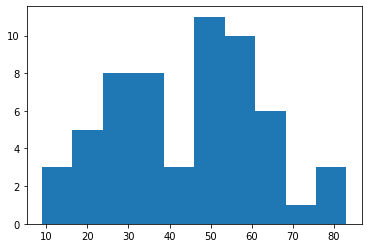

In [282]:
y = y[29:]
X = X[29:]
plt.hist(y)
plt.show()


In [283]:
test1 = SelectKBest(score_func=f_regression, k=50)
fit = test1.fit(X, y)
X = fit.transform(X)

In [284]:
runs = 5
important_features = [[] for i in range(runs)]

selector = RandomForestRegressor(n_estimators=30, criterion="absolute_error", random_state=42)
for i in range(runs):
    model = selector.fit(X, y)
    importances = model.feature_importances_

    for j in range(len(importances)):
        important_features[i].append(list(importances).index(importances[j])) if importances[j] > 0 else 0
for i in range(len(important_features) - 1):
    if i != 0:
         importances = set.intersection(*map(set, important_features))

In [285]:
importances = list(importances)
top_importances = importances[0:10]
top_X = X[..., top_importances]
X = X[..., importances]

In [286]:
feature = 8
ox = y
oy = X[:, feature]

C:\Users\Eugen\AppData\Local\Temp/ipykernel_16136/443961214.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
C:\Users\Eugen\AppData\Local\Temp/ipykernel_16136/443961214.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


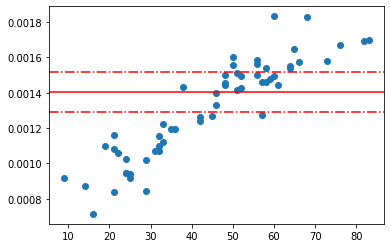

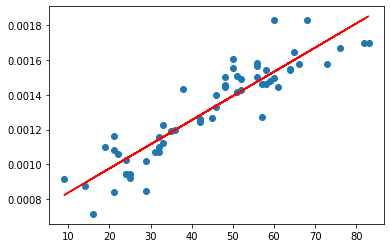

In [287]:
fig1 = plt.figure()
ax = plt.axes()

ax.scatter(ox, oy)
median = np.median(oy)
ax.axhline(median, c="r")
ax.axhline((median - (0.1 * (max(oy - min(oy))))), c="r", linestyle="-.")
ax.axhline((median + (0.1 * (max(oy - min(oy))))), c="r", linestyle="-.")
fig1.show()

fig2 = plt.figure()
ax = plt.axes()
ax.plot(ox, oy, 'o')
m, b = np.polyfit(ox, oy, 1)
ax.plot(ox, m * ox + b, c="r")
fig2.show()

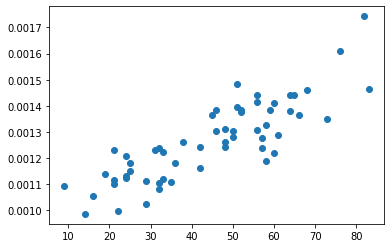

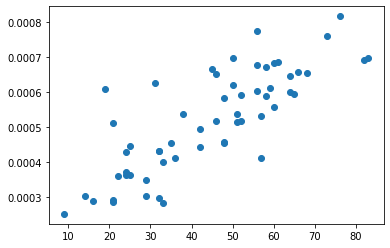

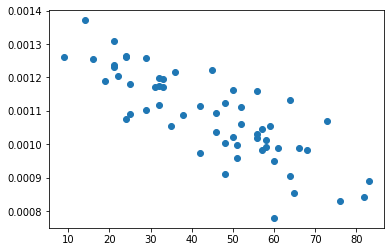

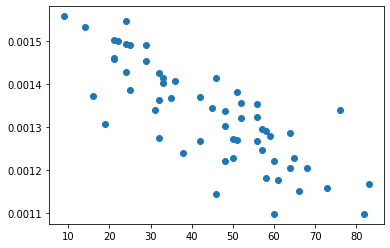

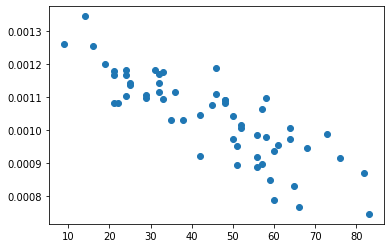

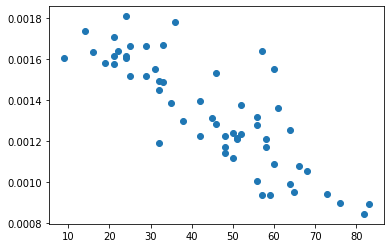

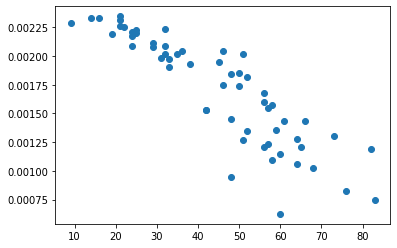

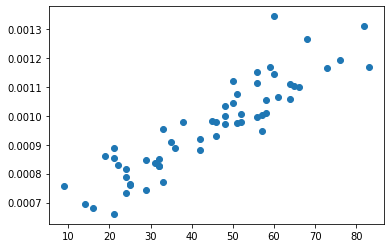

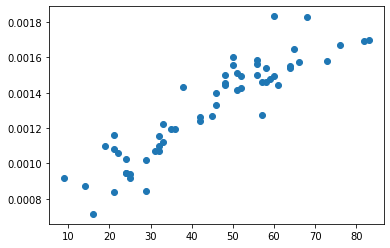

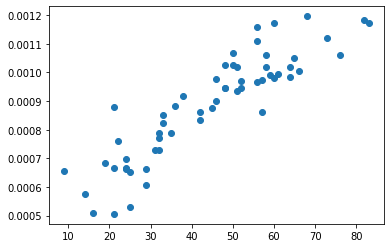

In [288]:
for i in range(10):
    oy = X[:, i]
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(ox,oy)
    fig.show

In [289]:
#names = names[importances]
#names = names.drop_duplicates()
#print(names)
#names.to_excel("../BIO_Ml/GSE52588/gene_names_CpG_based.xlsx")

In [290]:
#regressor = RandomForestRegressor(n_estimators=42, criterion="absolute_error", random_state=42)
regressor = SVR(kernel="poly", C = 1.5)
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    regressor.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(regressor.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.903747863756747, 0.8818839282555009]

Maximum Accuracy That can be obtained from this model is: 90.3747863756747 %

Minimum Accuracy: 88.18839282555008 %

Overall Accuracy: 89.28158960061239 %

Standard Deviation is: 0.015460137056356415


c:\users\eugen\pycharmprojects\python_study\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


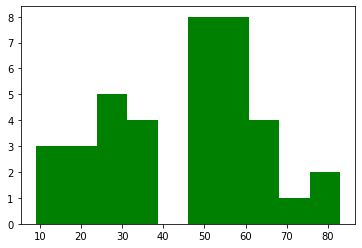

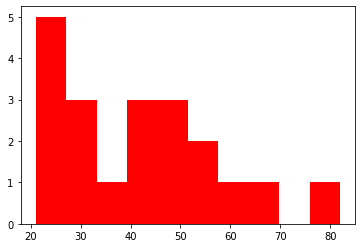

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.hist(y_train, color='g')
plt.show()
plt.hist(y_test, color="r")
plt.show()

In [292]:
#regressor = RandomForestRegressor(n_estimators=42, criterion="absolute_error", random_state=42)
#regressor = LinearRegression()
regressor = SVR(kernel="poly", C = 1.5)
model = regressor.fit(X_train, y_train)

In [293]:
y_pred = regressor.predict(X_test)
res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred,
                    "AE": y_test - y_pred,
                    "SE": (y_test - y_pred) ** 2})
print("MAE: ", mean_absolute_error(y_test, y_pred), "MSE: ", mean_squared_error(y_test, y_pred))
print(res)

MAE:  2.9774550729400913 MSE:  14.215031067760119
    Actual  Predicted        AE         SE
0       21  25.868487 -4.868487  23.702168
1       24  23.832204  0.167796   0.028156
2       56  65.412982 -9.412982  88.604221
3       36  32.234797  3.765203  14.176751
4       46  45.910304  0.089696   0.008045
5       61  55.853728  5.146272  26.484113
6       64  62.456298  1.543702   2.383015
7       33  29.800233  3.199767  10.238511
8       45  41.955155  3.044845   9.271080
9       32  30.480875  1.519125   2.307740
10      82  76.958497  5.041503  25.416752
11      21  21.591832 -0.591832   0.350266
12      51  56.438086 -5.438086  29.572778
13      42  44.143947 -2.143947   4.596510
14      33  32.357330  0.642670   0.413025
15      24  21.482823  2.517177   6.336181
16      25  24.506179  0.493821   0.243859
17      42  47.035785 -5.035785  25.359132
18      56  57.245321 -1.245321   1.550824
19      48  51.641084 -3.641084  13.257496


C:\Users\Eugen\AppData\Local\Temp/ipykernel_16136/4289472708.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_pred, "bo-", c="r")
C:\Users\Eugen\AppData\Local\Temp/ipykernel_16136/4289472708.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_test, "bo-", c="g")


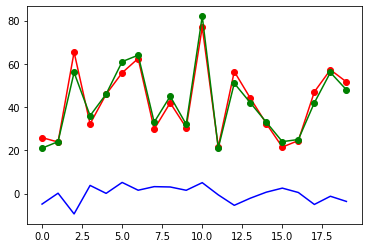

In [294]:
plt.plot(y_pred, "bo-", c="r")
plt.plot(y_test, "bo-", c="g")
plt.plot(y_test - y_pred, c="b")
plt.show()

In [295]:
# Посмотреть аномалии
# Нарисовать топ-n CpG
# Из VAC вытащить фичи
# Пересечь с лесом
# Проекция CpG на плоскость
# Стрим (проекция на сложное пространство)
# SHAP
